# Leukemia detection  Challenge (under development)
The objective of this challenge is to classify patients between leukemia or not.
## Basic info
© Tiago Tamagusko (tamagusko@gmail.com)  
Version: [CHANGELOG.md](/CHANGELOG.md)  
Project Page: <a href="https://github.com/tamagusko/jest20201">https://github.com/tamagusko/jest20201</a>  
License: [LICENSE](/LICENSE)

## Study Structure
1. Problem definition; 
2. Data collection (provided by [1]);
3. Data preparation;
4. Algorithms;
5. Improvements;
6. Results.

## Project data structure:
    
    ├── LeukemiaDetect.ipynb             # Python code
    ├── CHANGELOG.md                     # Project change log
    ├── LICENSE.md                       # License
    ├── README.md                        # Home
    ├── requirements.txt                 # Project requirements
    ├── data                             # Data (raw and processed)
    ├── reports                          # Outputs

## Future developments
- Use the k-fold and train a sample with all 128 sample data (I used 50/50);
- Test implementations with SVM, Kmeans;
- Study data balancing techniques.

## 1. Problem
Classify a group of patients as having leukemia (1) and without leukemia (0).
### 1.1 Proposal
Test various Machine Learning (ML) algorithms to try to predict leukemia patients. The dataset is provided with indicators taken from blood tests.
## 2. Data collection
The data was collected and prepared by José Rodrigues [1].
### 2.1 Dataset - [Leukemya_data.csv](https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/Leukemya_data.csv) [1]
- 178 patients; *Note: 128 train, 50 test/predict*
- 186 features. *Note: reduce*

### 2.2 Labels -  [labels.csv](https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/labels.csv) [1]
- labels of the first 128 patients;
- label 1: Without leukemia. *Note: Changed to 0*
- label 2: With leukemia; *Note: Changed to 1*


# 3. Data Preparation

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter(action='ignore')

TODAY = dt.datetime.now().strftime('%y%m%d')

# import Machine Learning Algorithms
# from sklearn.tree import DecisionTreeClassifier, plot_tree

## 3.1 Download datasets

In [2]:
# Reading dataset developed by [1]

urlBase = 'https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/Leukemya_data.csv'
urlLabels = 'https://raw.githubusercontent.com/spingegod/ProjetoTI_part2/master/labels.csv'


def getData(url):
    # only works with csv files (without head)
    df = pd.read_csv(url, header=None)
    return df


def saveData(df, folder='', name='temp'):
    # only works with csv files (add format parameter if necessary)
    # you can enter the entire path to the folder
    if folder == 'raw':
        folder = 'data/raw/'
    elif folder == 'processed':
        folder = 'data/processed/'
    elif folder == 'results':
        folder = 'results/'
    return df.to_csv(folder + str(TODAY) + '_' + name + '.csv')


data = getData(urlBase)
labels = getData(urlLabels)

# save raw data
saveData(data, 'raw', 'Leukemya_data')
saveData(labels, 'raw', 'labels')

# changing the labels to 0 and 1
labels = labels.add(-1)

# save processed data
saveData(labels, 'processed', 'labels')

## 3.2 Quick Data visualization

In [3]:
# data
data.shape

(178, 186)

In [4]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,0.64807,0.16853,-0.94017,0.57049,0.68297,0.17221,0.58435,0.071430,-1.440000,1.3522,...,1.01970,2.25020,0.27855,0.072376,0.23319,0.111960,1.1186,-0.22746,0.17707,0.161520
1,0.45781,0.24661,0.46806,-1.14030,0.35616,0.42955,0.51808,0.105430,0.019104,-1.4821,...,0.51232,0.36102,0.32950,0.219020,0.17505,0.054870,2.9294,10.62900,0.15601,0.046731
2,0.69736,0.19996,-0.98561,0.42796,0.73483,0.21918,0.55297,0.065897,-1.453600,1.6378,...,1.13520,2.00690,0.28918,0.095388,0.17238,0.053383,2.4876,6.08990,0.15226,0.033556


In [5]:
data.isna().any()

0      False
1      False
2      False
3      False
4      False
       ...  
181    False
182    False
183    False
184    False
185    False
Length: 186, dtype: bool

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.600470,0.201485,-0.344933,-0.286808,0.632020,0.287540,0.552424,0.082189,-0.824703,0.236309,...,0.472684,1.045795,0.333589,0.129445,0.226955,0.102015,1.492289,3.210325,0.185576,0.133609
std,0.073394,0.031226,0.584300,1.051375,0.100155,0.091728,0.036221,0.014602,0.660501,1.375195,...,0.609301,1.238343,0.066511,0.043993,0.037857,0.029705,1.080864,8.949080,0.042548,0.080806
min,0.376770,0.102720,-1.299800,-1.557600,0.338550,0.088063,0.424760,0.029278,-2.185700,-1.617800,...,-1.979500,-1.331900,0.171240,0.059657,0.149200,0.015450,-0.298160,-1.734000,0.140280,0.000000
25%,0.555767,0.189550,-0.758522,-0.961957,0.584640,0.219670,0.537710,0.075842,-1.261125,-0.724020,...,0.134622,0.280898,0.297960,0.099101,0.206740,0.090722,0.840605,-0.801597,0.163120,0.065188
50%,0.611900,0.204290,-0.479840,-0.466060,0.657045,0.275930,0.561140,0.084887,-0.907755,-0.136530,...,0.538395,0.805355,0.328025,0.119270,0.223460,0.107370,1.384650,0.597150,0.174630,0.110250
75%,0.652925,0.219668,-0.057454,-0.056106,0.705235,0.353475,0.576998,0.090970,-0.515713,0.879875,...,0.816458,1.562375,0.368625,0.150257,0.249032,0.121952,1.750450,2.135200,0.185935,0.203223
max,0.725140,0.277860,1.878300,5.181600,0.801370,0.554790,0.615770,0.108670,1.514800,6.337600,...,2.320500,6.687300,0.604310,0.316170,0.334130,0.156020,6.031600,66.292000,0.359070,0.317360


In [7]:
# labels
labels.T  # transpose

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [8]:
labels.shape

(128, 1)

In [9]:
labels.isna().any()

0    False
dtype: bool

In [10]:
# total of zeros
labels.isin([0]).sum()

0    111
dtype: int64

In [11]:
# total of ones (positive cases for leukemia)
labels.isin([1]).sum()

0    17
dtype: int64

In [12]:
# percentage of positive
round((labels.isin([1]).sum()/labels.isin([0]).sum())*100, 2)

0    15.32
dtype: float64

**NOTE: Apparently the data has already been cleared. There are no NAN fields in the sample.**

## 3.3 Split data in train/test/predict

In [13]:
train = data.iloc[0:128, :]
predictData = data.iloc[128:, :]

y = labels
X = train

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(
    X, y, train_size=0.5, random_state=0)  # obs: few positives
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape, y.shape

((64, 186), (64, 186), (64, 1), (64, 1), (128, 1))

**NOTE: Is 17 positive in only 128 patients enough? Approach chosen: Feature selection.**

# 4. Algorithms
**Note: There are 186 features, the ideal is to select only the most relevant ones. Maybe 10 ~ 20 (or less).**

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 4.1 Feature selection

In [16]:
k_vs_score = []

for k in range(2, 186, 2):
    selector = SelectKBest(score_func=f_classif, k=k)

    Xtrain2 = selector.fit_transform(Xtrain, ytrain)
    Xval2 = selector.transform(Xval)

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(Xtrain2, ytrain)

    p = clf.predict(Xval2)

    score = mean_absolute_error(yval, p)
    k_vs_score.append(score)

    # This code may take a long time to run (~1 min)

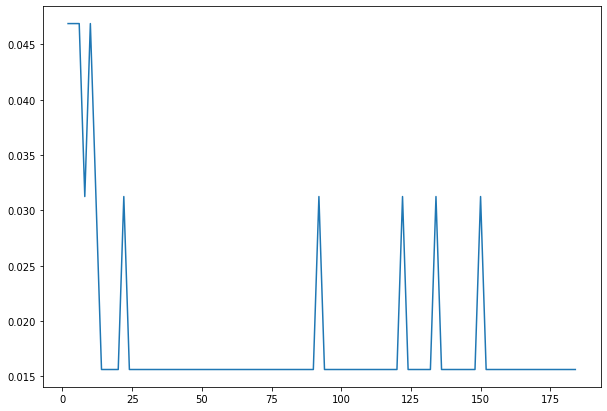

In [17]:
pd.Series(k_vs_score, index=range(2, 186, 2)).plot(figsize=(10, 7))

In [18]:
# zero error (classification problem...)? Why? REVIEW THIS PART!
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(Xtrain, ytrain)

SelectKBest(k=15, score_func=<function f_classif at 0x7f98e95cb700>)

In [19]:
mask = selector.get_support()
Xval.columns[mask]

Int64Index([1, 6, 7, 8, 10, 36, 38, 53, 120, 121, 122, 125, 132, 133, 167], dtype='int64')

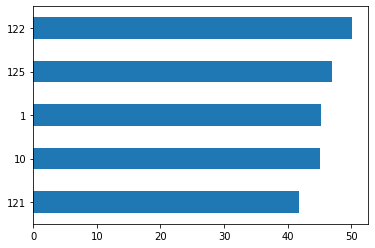

In [20]:
pd.Series(selector.scores_, index=Xtrain.columns).sort_values().tail().plot.barh()

## 4.2 Select data to train and predict

In [21]:
k = 15
selector = SelectKBest(score_func=f_classif, k=k)

Xtrain2 = selector.fit_transform(Xtrain, ytrain)
Xval2 = selector.transform(Xval)
predictData2 = selector.transform(predictData)

## 4.3 Decision Tree

### 4.3.1 Model

In [22]:
decisionTree = DecisionTreeClassifier(max_depth=3, random_state=0)
decisionTree.fit(Xtrain2,ytrain)

predictTree = decisionTree.predict(predictData2)
predictTree

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### 4.3.2 Test

In [23]:
pTreeTest = decisionTree.predict(Xval2)
meanAbsTree = mean_absolute_error(yval, pTreeTest)
accuracyTree = accuracy_score(yval, pTreeTest)
meanAbsTree, accuracyTree

(0.0625, 0.9375)

### 4.3.3 Save results

In [24]:
Tree_50split = pd.DataFrame(data=predictTree)
# add column ID from predict Data
Tree_50split['ID'] = predictData.index.values
# set column ID as index
Tree_50split.set_index('ID', inplace=True)
# save result as csv
saveData(Tree_50split, 'results', 'Tree_50split')

### 4.3.4 Decision Tree View

[Text(418.5, 362.4, 'node #0\n8 <= 0.263\ngini = 0.219\nsamples = 100.0%\nvalue = [0.875, 0.125]\nclass = Negative'),
 Text(209.25, 217.44, 'node #1\n14 <= 0.019\ngini = 0.245\nsamples = 10.9%\nvalue = [0.143, 0.857]\nclass = Positive'),
 Text(104.625, 72.47999999999996, 'node #2\ngini = 0.0\nsamples = 1.6%\nvalue = [1.0, 0.0]\nclass = Negative'),
 Text(313.875, 72.47999999999996, 'node #3\ngini = 0.0\nsamples = 9.4%\nvalue = [0.0, 1.0]\nclass = Positive'),
 Text(627.75, 217.44, 'node #4\n14 <= 0.139\ngini = 0.068\nsamples = 89.1%\nvalue = [0.965, 0.035]\nclass = Negative'),
 Text(523.125, 72.47999999999996, 'node #5\ngini = 0.0\nsamples = 85.9%\nvalue = [1.0, 0.0]\nclass = Negative'),
 Text(732.375, 72.47999999999996, 'node #6\ngini = 0.0\nsamples = 3.1%\nvalue = [0.0, 1.0]\nclass = Positive')]

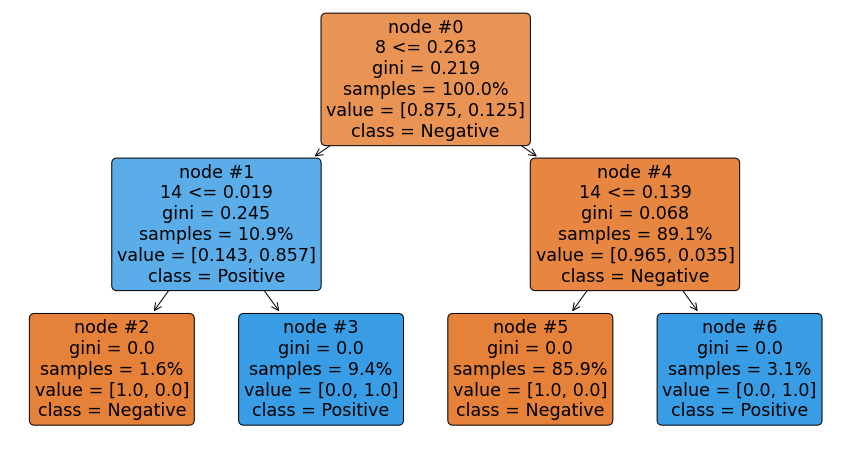

In [25]:
plt.figure(figsize=(15,8))
plot_tree(decisionTree,
          max_depth = 3,
          impurity = True,
          feature_names = list(Xtrain),
          class_names = ['Negative', 'Positive'],
          node_ids = True,
          proportion = True,
          rounded = True,
          filled=True)  #feature_names=y_pred, class_names=x_test,

## 4.4 Random Forest

### 4.4.1 Model

In [26]:
RForest = RandomForestClassifier(max_depth=2, random_state=0)
RForest.fit(Xtrain2, ytrain)

predictRF = RForest.predict(predictData2)
predictRF

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### 4.4.2 Test

In [27]:
pRFTest = RForest.predict(Xval2)
meanAbsRF = mean_absolute_error(yval, pRFTest)
accuracyRF = accuracy_score(yval, pRFTest)
meanAbsRF, accuracyRF

(0.03125, 0.96875)

### 4.4.3 Save results

In [28]:
RF_50split = pd.DataFrame(data=predictRF)
# add column ID from predict Data
RF_50split['ID'] = predictData.index.values
# set column ID as index
RF_50split.set_index('ID', inplace=True)
# save result as csv
saveData(RF_50split, 'results', 'RF_50split')

# 5. Improvements

Nothing at the moment =)

# 6. Results

Nothing at the moment =) 

Maybe RF?

## Please do not run any metrics on these results, this is just a first draft. I'm still thinking about the best approach.

# Citation
Tamagusko, T. (2020). Initiation Project JEST 2020/1. Part 2. Retrieved from https://github.com/tamagusko/jest20201  
## References <a id="ref"></a>
[1] Dataset to support the study. (2020, May 31). Retrieved from https://github.com/spingegod/ProjetoTI_part2